In [2]:
import numpy as np
import os,sys,glob
import matplotlib.pyplot as plt
from pygeotools.lib import iolib,warplib,malib,geolib
from imview import pltlib


Bad key "text.kerning_factor" on line 4 in
/nobackup/sbhusha1/sw/miniconda3/envs/bhushan_PY3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
%matplotlib notebook

### Pre-icp difference map

In [3]:
pre_icp_skysat_srtm = '/nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_gl1_srtm_processing/proc_out/final_pinhole_stereo/composite_dems/triplet_median_mos.tif'
pre_icp_skysat_lidar = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/composite_dems/triplet_median_mos.tif'
pre_icp_ds_list = warplib.memwarp_multi_fn([pre_icp_skysat_srtm,pre_icp_skysat_lidar])


Warping all inputs to the following:
Resolution: 2.0
Extent: [583541.0, 5175803.0, 591041.0, 5199159.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_gl1_srtm_processing/proc_out/final_pinhole_stereo/composite_dems/triplet_median_mos.tif
nl: 11678 ns: 3750 res: 2.000
2 of 2: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/composite_dems/triplet_median_mos.tif
nl: 11678 ns: 3750 res: 2.000


In [4]:
pre_icp_diff = iolib.ds_getma(pre_icp_ds_list[0]) - iolib.ds_getma(pre_icp_ds_list[1])

<IPython.core.display.Javascript object>


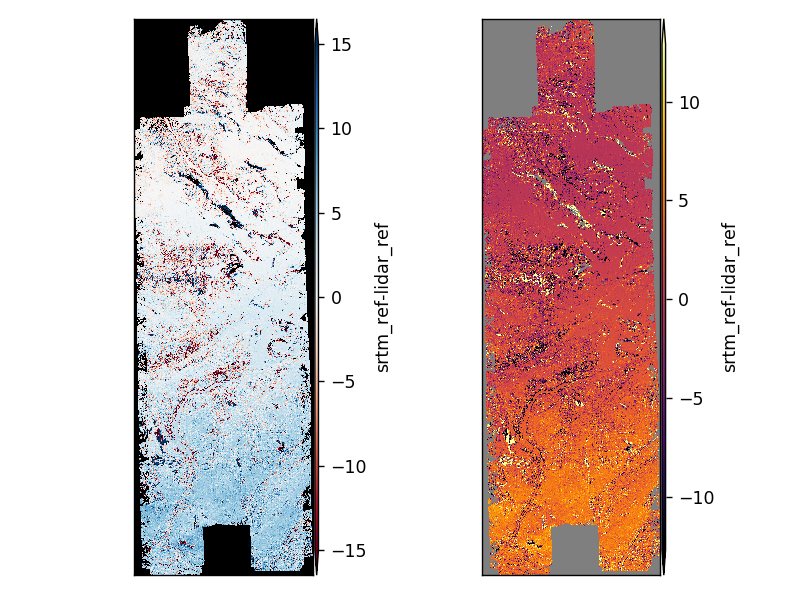

In [6]:
f,ax = plt.subplots(1,2)
pltlib.iv(pre_icp_diff,cmap='RdBu',clim=(-15,15),label='srtm_ref-lidar_ref',ax=ax[0])
pltlib.iv(pre_icp_diff,cmap='inferno',label='srtm_ref-lidar_ref',ax=ax[1])

#### Pre_icp LidarSkysat - Lidar

In [11]:
lidar_dem = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_lidar_dsm_1m-adj_shpclip_trim.tif'

In [ ]:
lidar_dem = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_lidar_dsm_1m-adj_shpclip_trim.tif'
pre_icp_lidar_ref_diff_ds_list = warplib.memwarp_multi_fn([lidar_dem,pre_icp_skysat_lidar],res=2)
pre_icp_lidar_ref_diff = iolib.ds_getma(pre_icp_lidar_ref_diff_ds_list[1])-iolib.ds_getma(pre_icp_lidar_ref_diff_ds_list[0])

<IPython.core.display.Javascript object>


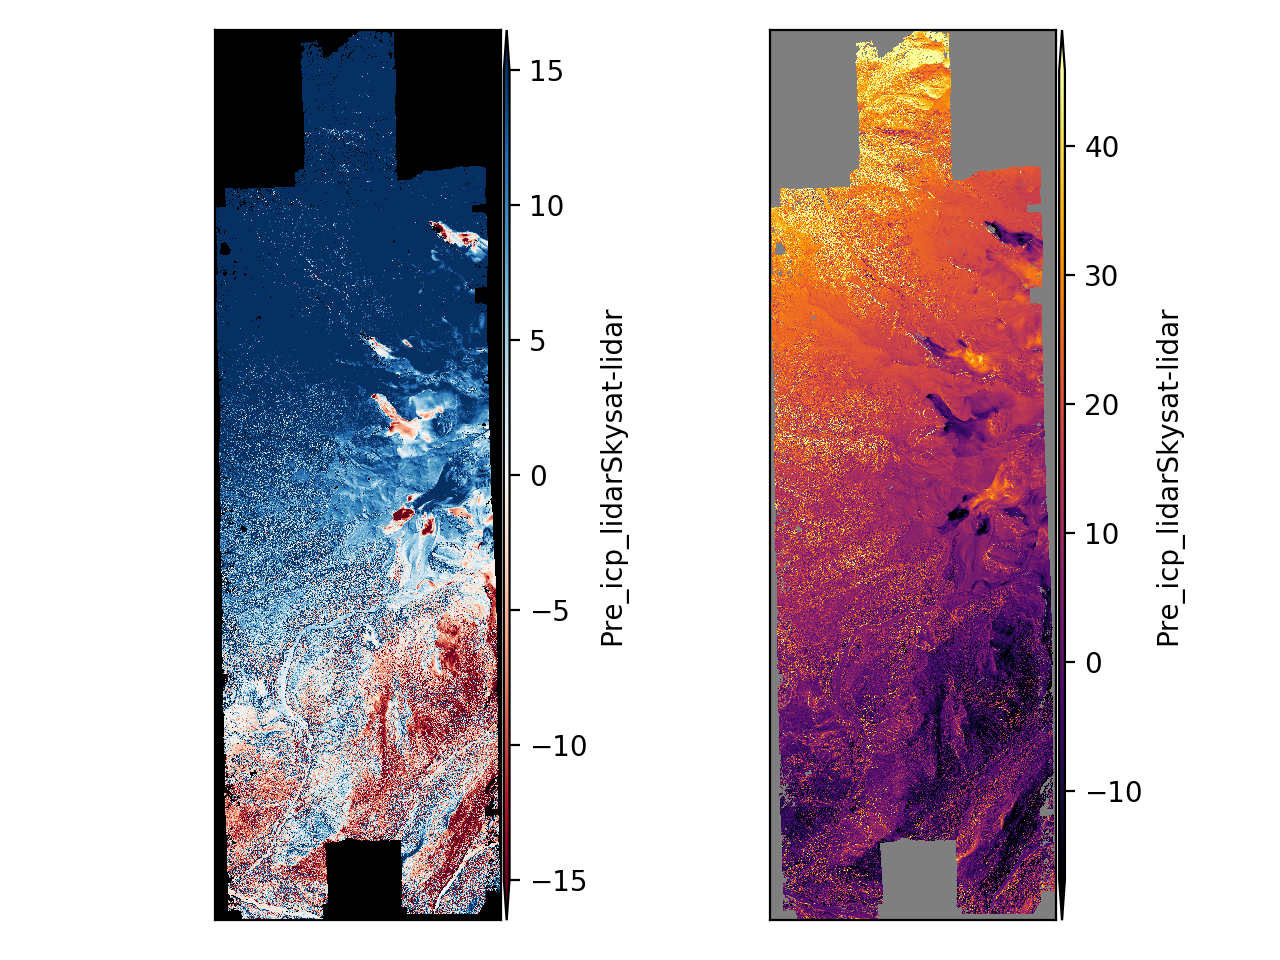

In [9]:
f,ax = plt.subplots(1,2)
pltlib.iv(pre_icp_lidar_ref_diff,cmap='RdBu',
          clim=(-15,15),label='Pre_icp_lidarSkysat-lidar',ax=ax[0])
pltlib.iv(pre_icp_lidar_ref_diff,cmap='inferno',
          label='Pre_icp_lidarSkysat-lidar',ax=ax[1])

### Pre_icp_srtmSkysat - Srtm

In [7]:
srtm_dem = '/nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/srtm_gl1_rainier_proj_32610.tif'
pre_icp_srtm_ref_diff_ds_list = warplib.memwarp_multi_fn([srtm_dem,pre_icp_skysat_srtm])
pre_icp_srtm_ref_diff = iolib.ds_getma(pre_icp_srtm_ref_diff_ds_list[1])-iolib.ds_getma(pre_icp_srtm_ref_diff_ds_list[0])


Warping all inputs to the following:
Resolution: 30.0
Extent: [583541.0, 5175803.0, 591047.0, 5199159.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/srtm_gl1_rainier_proj_32610.tif
nl: 779 ns: 250 res: 30.000
2 of 2: /nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_gl1_srtm_processing/proc_out/final_pinhole_stereo/composite_dems/triplet_median_mos.tif
nl: 779 ns: 250 res: 30.000


<IPython.core.display.Javascript object>


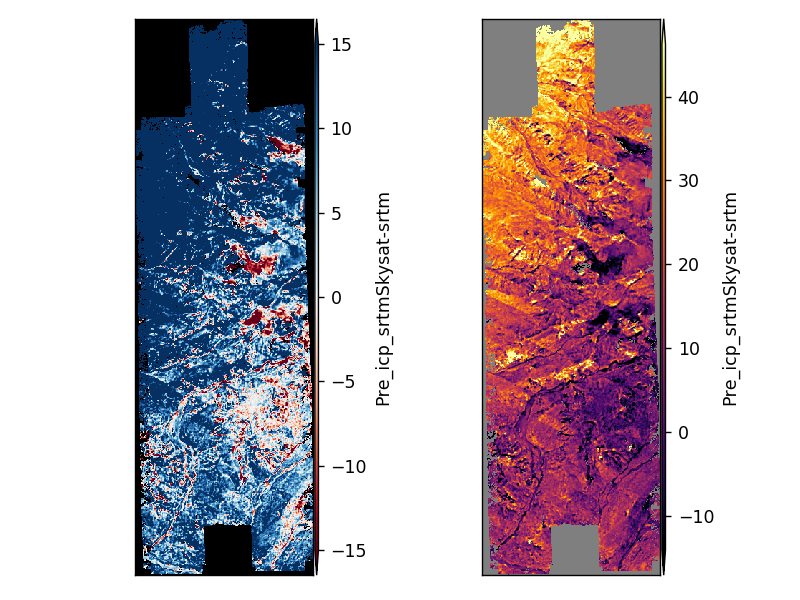

In [8]:
f,ax = plt.subplots(1,2)
pltlib.iv(pre_icp_srtm_ref_diff,cmap='RdBu',
          clim=(-15,15),label='Pre_icp_srtmSkysat-srtm',ax=ax[0])
pltlib.iv(pre_icp_srtm_ref_diff,cmap='inferno',
          label='Pre_icp_srtmSkysat-srtm',ax=ax[1])

#### SRTM - LiDAR

In [12]:
extent = geolib.ds_extent(pre_icp_srtm_ref_diff_ds_list[0])
srtm_lidar_ds_list = warplib.memwarp_multi_fn([srtm_dem,lidar_dem],extent=extent)
lidar_srtm_diff = iolib.ds_getma(srtm_lidar_ds_list[1])-iolib.ds_getma(srtm_lidar_ds_list[0])


Warping all inputs to the following:
Resolution: 30.0
Extent: [583541.0, 5175789.0, 591041.0, 5199159.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/srtm_gl1_rainier_proj_32610.tif
nl: 779 ns: 250 res: 30.000
2 of 2: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_lidar_dsm_1m-adj_shpclip_trim.tif
nl: 779 ns: 250 res: 30.000


<IPython.core.display.Javascript object>


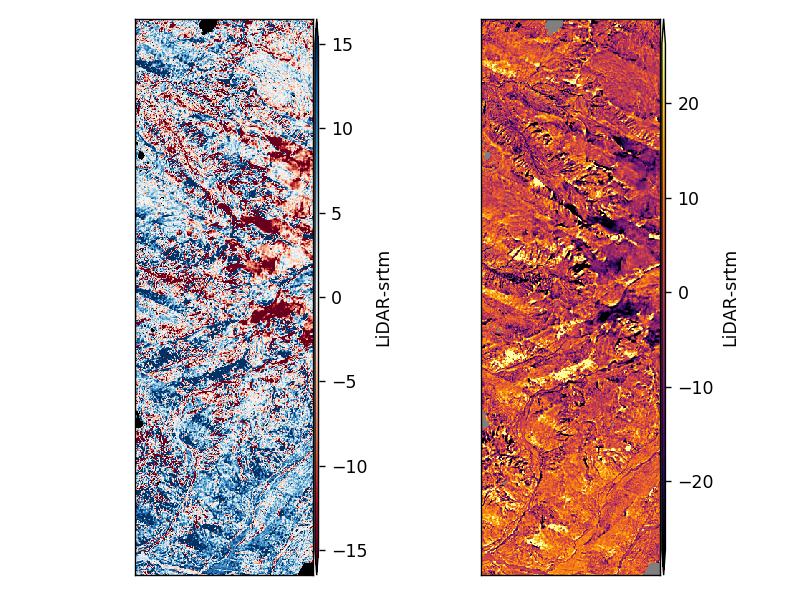

In [13]:
f,ax = plt.subplots(1,2)
pltlib.iv(lidar_srtm_diff,cmap='RdBu',
          clim=(-15,15),label='LiDAR-srtm',ax=ax[0])
pltlib.iv(lidar_srtm_diff,cmap='inferno',
          label='LiDAR-srtm',ax=ax[1])

### Post_icp SRTM set comparison
All glaciers and forests were removed from the static surface

In [14]:
aligned_skysat_srtm_trans_rot = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_gl1_srtm_processing/proc_out/georegistered_dem_mos/run-trans_reference-DEM.tif'
aligned_srtm_ds_list_trans_rot = warplib.memwarp_multi_fn([srtm_dem,aligned_skysat_srtm_trans_rot])
aligned_srtm_skysat_diff_trans_rot = iolib.ds_getma(aligned_srtm_ds_list_trans_rot[1]) - iolib.ds_getma(aligned_srtm_ds_list_trans_rot[0])


Warping all inputs to the following:
Resolution: 30.0
Extent: [583541.0, 5175803.0, 591057.0, 5199163.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/srtm_gl1_rainier_proj_32610.tif
nl: 779 ns: 251 res: 30.000
2 of 2: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_gl1_srtm_processing/proc_out/georegistered_dem_mos/run-trans_reference-DEM.tif
nl: 779 ns: 251 res: 30.000


<IPython.core.display.Javascript object>


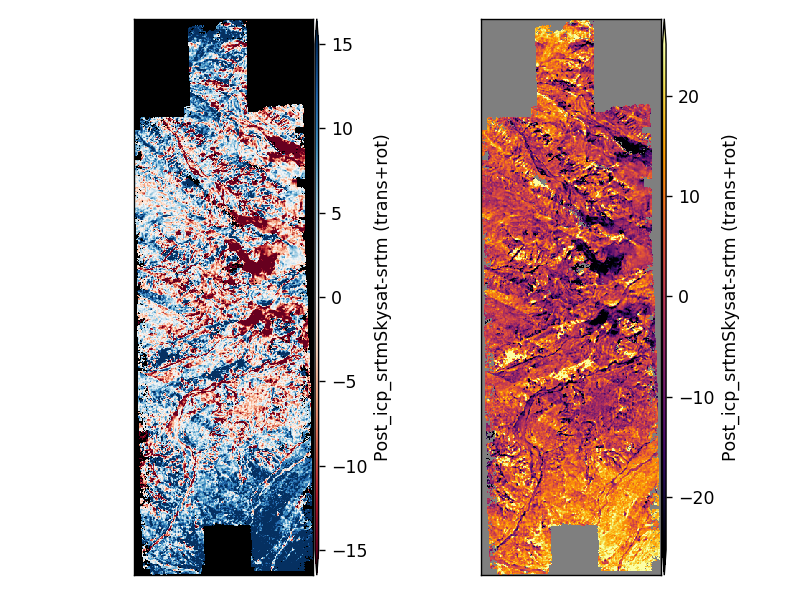

In [15]:
f,ax = plt.subplots(1,2)
pltlib.iv(aligned_srtm_skysat_diff_trans_rot,cmap='RdBu',
          clim=(-15,15),label='Post_icp_srtmSkysat-srtm (trans+rot)',ax=ax[0])
pltlib.iv(aligned_srtm_skysat_diff_trans_rot,cmap='inferno',
          label='Post_icp_srtmSkysat-srtm (trans+rot)',ax=ax[1])

Analysing ICP error points is important

In [16]:
icp_diff_init = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_gl1_srtm_processing/proc_out/georegistered_dem_mos/run-beg_errors.csv'
icp_diff_fin = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_gl1_srtm_processing/proc_out/georegistered_dem_mos/run-end_errors.csv'

In [17]:
import pandas as pd

In [18]:
pc_align_df_init = pd.read_csv(icp_diff_init,skiprows=[1,2])
pc_align_df_fin = pd.read_csv(icp_diff_fin,skiprows=[1,2])

In [29]:
pc_align_df_init.keys()

Index(['# latitude', 'longitude', 'height above datum (meters)',
       'error (meters)'],
      dtype='object')

<IPython.core.display.Javascript object>


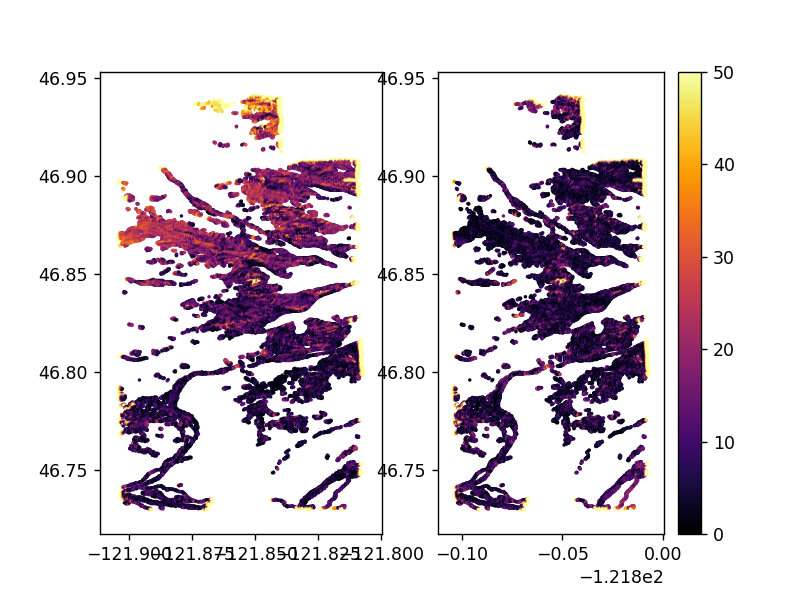

In [19]:
f,ax = plt.subplots(1,2)
im = ax[0].scatter(pc_align_df_init['longitude'],pc_align_df_init['# latitude'],c=pc_align_df_init['error (meters)'],cmap='inferno',vmin=0,vmax=50,s=1)
im2 = ax[1].scatter(pc_align_df_fin['longitude'],pc_align_df_fin['# latitude'],c=pc_align_df_fin['error (meters)'],cmap='inferno',vmin=0,vmax=50,s=1)
plt.colorbar(im)

### Post ICP lidar reference Analysis

In [20]:
aligned_skysat_lidar_trans_rot = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned2srtm_exposed_surface_trans_rot_max_disp40/run-trans_source-DEM.tif'
aligned_lidar_ds_list_trans_rot = warplib.memwarp_multi_fn([lidar_dem,aligned_skysat_lidar_trans_rot],res=2)
aligned_lidar_skysat_diff_trans_rot = iolib.ds_getma(aligned_lidar_ds_list_trans_rot[1]) - iolib.ds_getma(aligned_lidar_ds_list_trans_rot[0])


Warping all inputs to the following:
Resolution: 2.0
Extent: [583533.0, 5175797.0, 591053.0, 5199185.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_lidar_dsm_1m-adj_shpclip_trim.tif
nl: 11694 ns: 3760 res: 2.000
2 of 2: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned2srtm_exposed_surface_trans_rot_max_disp40/run-trans_source-DEM.tif


<IPython.core.display.Javascript object>


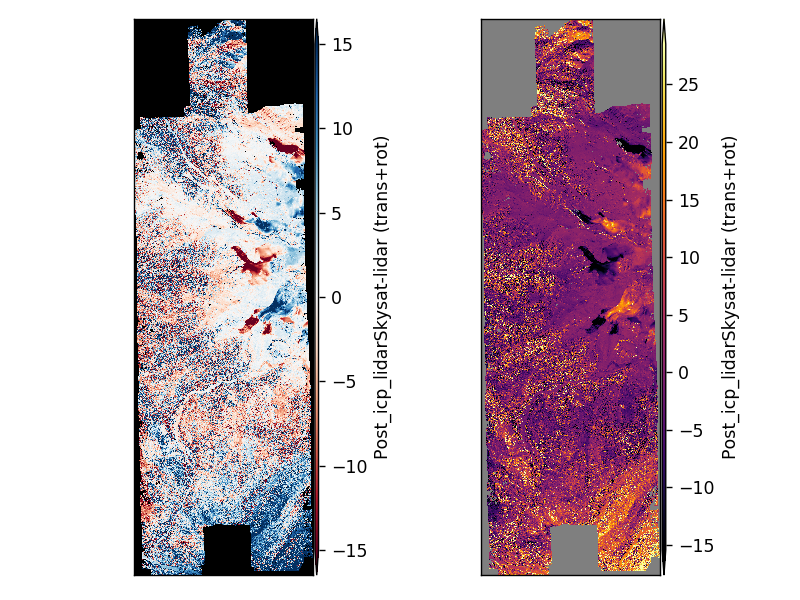

In [21]:
f,ax = plt.subplots(1,2)
pltlib.iv(aligned_lidar_skysat_diff_trans_rot,cmap='RdBu',
          clim=(-15,15),label='Post_icp_lidarSkysat-lidar (trans+rot)',ax=ax[0])
pltlib.iv(aligned_lidar_skysat_diff_trans_rot,cmap='inferno',
          label='Post_icp_lidarSkysat-lidar (trans+rot)',ax=ax[1])

In [22]:
icp_diff_init_lidar = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned2srtm_exposed_surface_trans_rot_max_disp40/run-beg_errors.csv'
icp_diff_fin_lidar = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned2srtm_exposed_surface_trans_rot_max_disp40/run-end_errors.csv'
pc_align_df_init_lidar = pd.read_csv(icp_diff_init_lidar,skiprows=[1,2])
pc_align_df_fin_lidar = pd.read_csv(icp_diff_fin_lidar,skiprows=[1,2])

<IPython.core.display.Javascript object>


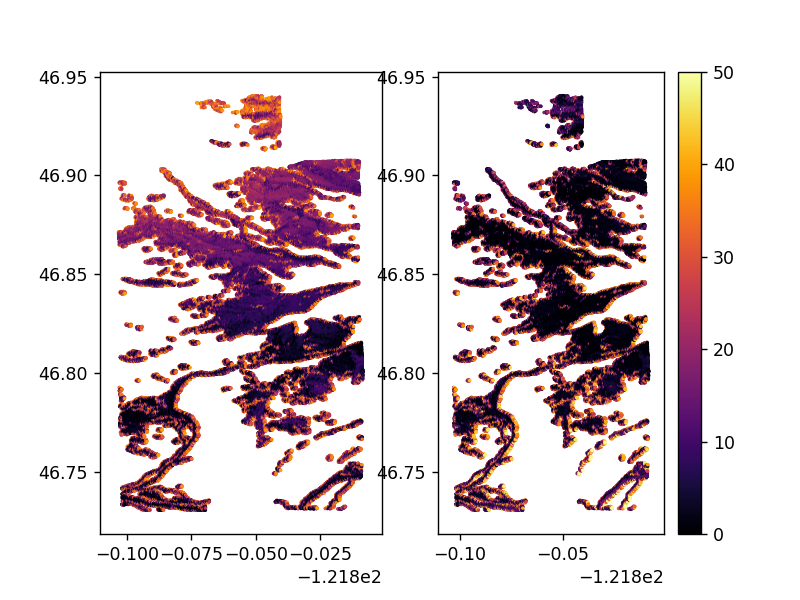

In [23]:
f,ax = plt.subplots(1,2)
im = ax[0].scatter(pc_align_df_init_lidar['longitude'],pc_align_df_init_lidar['# latitude'],c=pc_align_df_init_lidar['error (meters)'],cmap='inferno',vmin=0,vmax=50,s=1)
im2 = ax[1].scatter(pc_align_df_fin_lidar['longitude'],pc_align_df_fin_lidar['# latitude'],c=pc_align_df_fin_lidar['error (meters)'],cmap='inferno',vmin=0,vmax=50,s=1)
plt.colorbar(im)

### How does the two SkySat DEMs compare now, without any co-registration

In [24]:
skysat_lidar_srtm_ds_list = warplib.memwarp_multi_fn([aligned_skysat_lidar_trans_rot,aligned_skysat_srtm_trans_rot])
skysat_post_icp_diff = iolib.ds_getma(skysat_lidar_srtm_ds_list[1]) - iolib.ds_getma(skysat_lidar_srtm_ds_list[0])


Warping all inputs to the following:
Resolution: 2.0
Extent: [583541.0, 5175803.0, 591053.0, 5199163.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned2srtm_exposed_surface_trans_rot_max_disp40/run-trans_source-DEM.tif
nl: 11680 ns: 3756 res: 2.000
2 of 2: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_gl1_srtm_processing/proc_out/georegistered_dem_mos/run-trans_reference-DEM.tif
nl: 11680 ns: 3756 res: 2.000


<IPython.core.display.Javascript object>


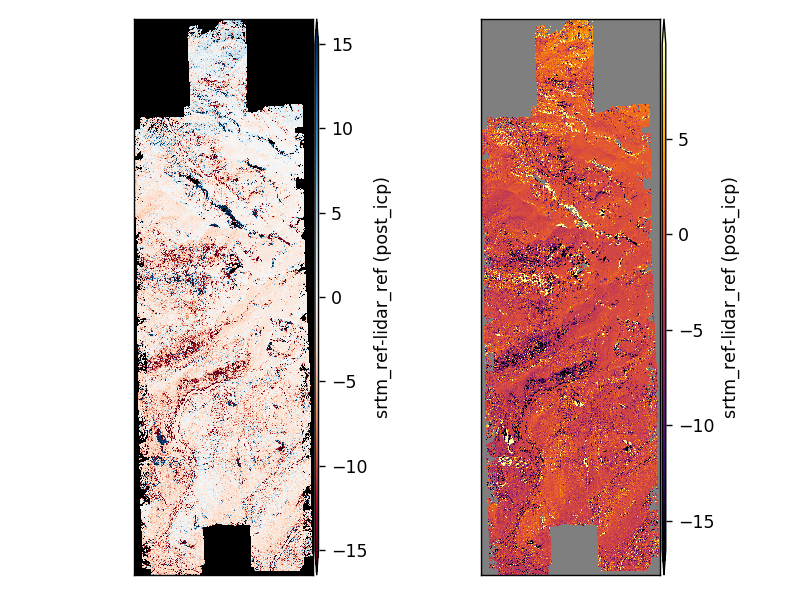

In [25]:
f,ax = plt.subplots(1,2)
pltlib.iv(skysat_post_icp_diff,cmap='RdBu',clim=(-15,15),label='srtm_ref-lidar_ref (post_icp)',ax=ax[0])
pltlib.iv(skysat_post_icp_diff,cmap='inferno',label='srtm_ref-lidar_ref (post_icp)',ax=ax[1])

In [26]:
malib.get_stats_dict(skysat_post_icp_diff)

{'count': 34609353,
 'min': -205.26171875,
 'max': 215.9375,
 'ptp': 421.19921875,
 'mean': -1.6985388566784245,
 'std': 6.779374358908957,
 'nmad': 2.0776669921875,
 'med': -1.345703125,
 'median': -1.345703125,
 'p16': -4.2548828125,
 'p84': 0.7724609375,
 'spread': 2.513671875,
 'mode': -1.2841796875}

In [27]:
malib.get_stats_dict(pre_icp_diff)

{'count': 34405452,
 'min': -208.63525390625,
 'max': 216.3681640625,
 'ptp': 425.00341796875,
 'mean': 1.7317331831356173,
 'std': 6.636838868693063,
 'nmad': 2.9594085937499996,
 'med': 1.61328125,
 'median': 1.61328125,
 'p16': -0.9912109375,
 'p84': 5.2861328125,
 'spread': 3.138671875,
 'mode': 0.103515625}

#### Now align these two DEMs and then compare

In [28]:
residual_aligned_skysat = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned_skysats_transrot_gl1/run_output_srtm_gl1-trans_source-DEM.tif'

In [29]:
residual_coreg_interSkysat_ds_list = warplib.memwarp_multi_fn([aligned_skysat_lidar_trans_rot,residual_aligned_skysat])
skysat_post_icp_residual_corr_diff = iolib.ds_getma(residual_coreg_interSkysat_ds_list[1]) - iolib.ds_getma(residual_coreg_interSkysat_ds_list[0])


Warping all inputs to the following:
Resolution: 2.0
Extent: [583541.0, 5175801.0, 591053.0, 5199163.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned2srtm_exposed_surface_trans_rot_max_disp40/run-trans_source-DEM.tif
nl: 11681 ns: 3756 res: 2.000
2 of 2: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned_skysats_transrot_gl1/run_output_srtm_gl1-trans_source-DEM.tif
nl: 11681 ns: 3756 res: 2.000


<IPython.core.display.Javascript object>


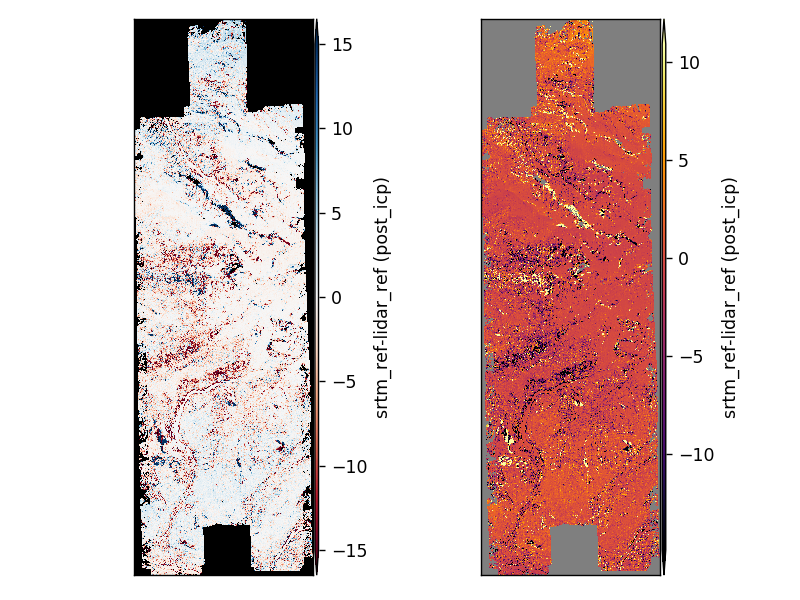

In [30]:
f,ax = plt.subplots(1,2)
pltlib.iv(skysat_post_icp_residual_corr_diff,cmap='RdBu',clim=(-15,15),label='srtm_ref-lidar_ref (post_icp)',ax=ax[0])
pltlib.iv(skysat_post_icp_residual_corr_diff,cmap='inferno',label='srtm_ref-lidar_ref (post_icp)',ax=ax[1])

In [31]:
malib.get_stats_dict(skysat_post_icp_residual_corr_diff)

{'count': 34724429,
 'min': -204.845703125,
 'max': 214.3330078125,
 'ptp': 419.1787109375,
 'mean': -0.41510402937101754,
 'std': 6.682638474973212,
 'nmad': 1.62738515625,
 'med': -0.1220703125,
 'median': -0.1220703125,
 'p16': -2.6376953125,
 'p84': 1.75,
 'spread': 2.19384765625,
 'mode': -0.1708984375}

<IPython.core.display.Javascript object>


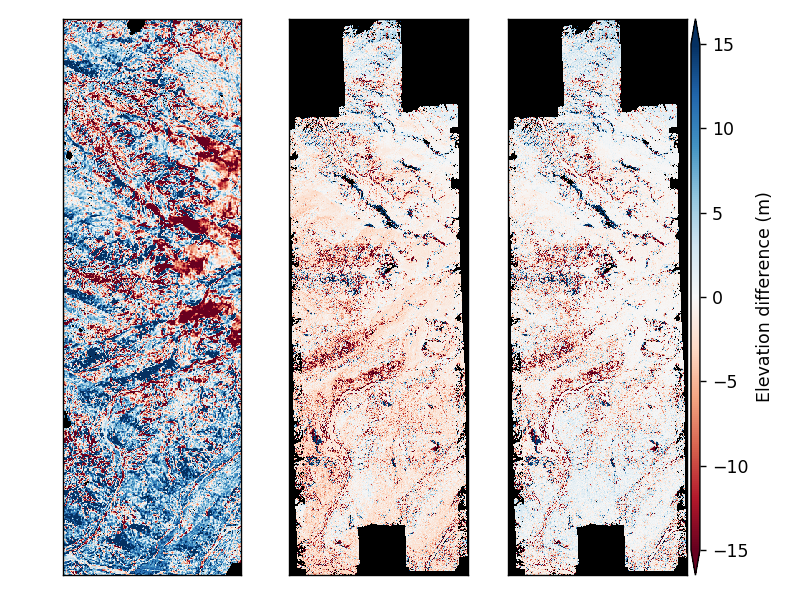

In [43]:
f,ax = plt.subplots(1,3)
pltlib.iv(lidar_srtm_diff,cmap='RdBu',clim=(-15,15),label='Elevation difference (m)',title='',ax=ax[0],cbar=False)
pltlib.iv(skysat_post_icp_diff,cmap='RdBu',clim=(-15,15),label='Elevation difference (m)', title='',ax=ax[1],cbar=False)
pltlib.iv(skysat_post_icp_residual_corr_diff,cmap='RdBu',clim=(-15,15),label='Elevation difference (m)', title='',ax=ax[2],skinny=False)
plt.tight_layout()
import string
label_itereator = string.ascii_uppercase
#for idx,axes in enumerate(ax):
    #axes.text(0.02,0.95,label_itereator[idx],color='gray',fontsize=16,transform=axes.transAxes)
f.savefig('/nobackup/sbhusha1/skysat_manuscript/figures/Supplemtary_x4.jpg',
            dpi=300,bbox_inches='tight',pad_inches=0.1)